In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dac_analysis import get_df

df = get_df("data.csv")
likerts = df[[c for c in df.columns if c.endswith(".")]]

my_scale = [
    "Stimme voll und ganz zu",
    "Stimme zu",
    "Stimme nicht zu",
    "Stimme überhaupt nicht zu",
    "Stimme weder zu noch lehne ich ab",
    "Weiß nicht",
]

In [3]:
# i think this means the same, right?
likerts = likerts.replace({"Stimme ich zu": "Stimme zu"})
likerts.columns

Index(['Der Klimawandel findet tatsächlich statt.',
       'Der Klimawandel ist ein ernstes Problem.',
       'Menschliche Aktivitäten sind die Hauptursache des Klimawandels.',
       'Wir alle sollten uns bemühen, unseren CO2-Ausstoß zu reduzieren.',
       'DAC ist eine ausgereifte saubere Technologie.',
       'Menschen sollten die Natur nicht auf diese Weise manipulieren.',
       'Ich denke nicht, dass das Einbringen von CO2 in den Boden eine gute Idee ist.',
       'Versuche, das Klimasystem durch die Anwendung von DAC zu beeinflussen, zeugen von menschlichem Hochmut.',
       'Emissionen zu reduzieren wäre kosteneffizienter als DAC.',
       '100 € für die Entnahme von 1 Tonne CO2 zu zahlen, ist ein angemessener Preis.',
       'DAC könnte dazu beitragen, schwer vermeidbare Emissionen aus Sektoren wie Landwirtschaft oder Zementproduktion zu entnehmen.',
       'Die Implementierung von DAC als Teil einer Gesamtstrategie kann Deutschland dabei helfen, seine Klimaziele zu erreichen

/Users/Buntemey/miniforge3/envs/dac/lib/python3.10/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/Users/Buntemey/miniforge3/envs/dac/lib/python3.10/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]
/Users/Buntemey/miniforge3/envs/dac/lib/python3.10/site-packages/plot_likert/plot_likert.py:313: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the sa

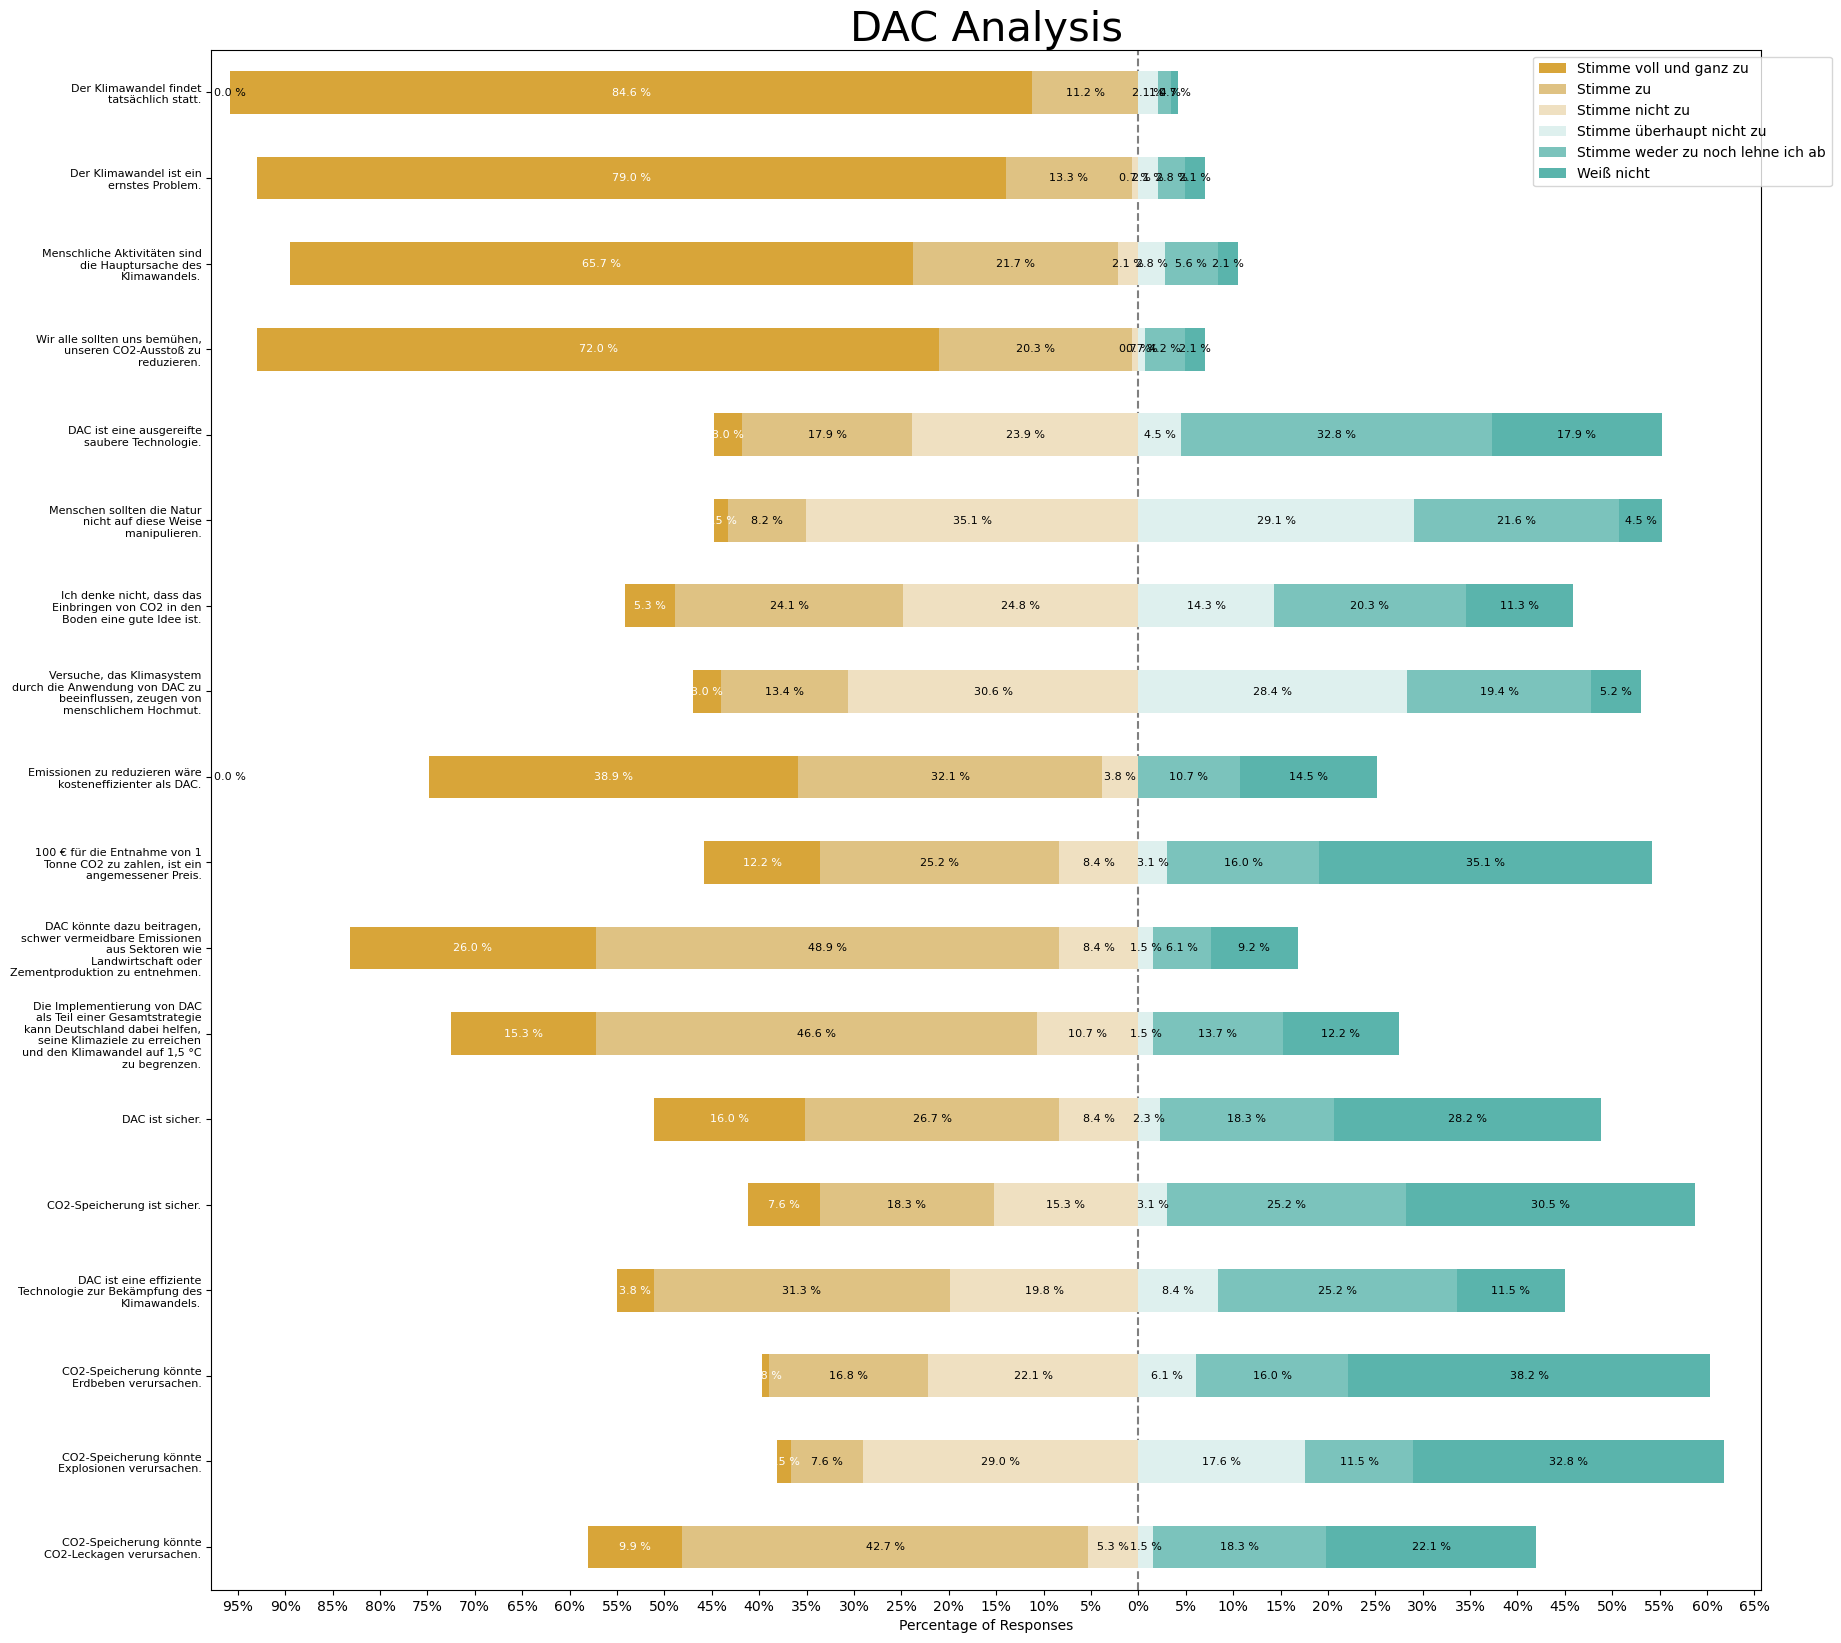

In [4]:
import pandas as pd
# pip install plot-likert
# https://stackoverflow.com/questions/70975856/adding-percentages-to-subgroups-of-each-group-likert-scale-python
import plot_likert

# create a likert plot
ax1 = plot_likert.plot_likert(
    likerts,
    my_scale,
    plot_percentage=True,
    figsize=(20, 20),
    colors=plot_likert.colors.likert6,
)
ax1.set_title(("DAC Analysis"), fontsize=30)
# ax1.set_ylabel('Question regarding DAC',fontdict={'fontsize':12})
# ax1.set_xlabel('% Breakdown',fontdict={'fontsize':12})
ax1.tick_params(axis="y", labelsize=8)
ax1.tick_params(axis="x", labelsize=10)

for bars, color in zip(ax1.containers[1:], ["white"] + ["black"] * 2 + ["black"] * 3):
    ax1.bar_label(bars, label_type="center", fmt="%.1f %%", color=color, fontsize=8)